In [1]:
from processing.image_processing import Circle, ImageProcessor, ImageLoader

In [2]:
circle = Circle(500, 200)

In [3]:
mitsuha = ImageLoader("inputs/meteor.jpeg")

In [4]:
import matplotlib.pyplot as plt

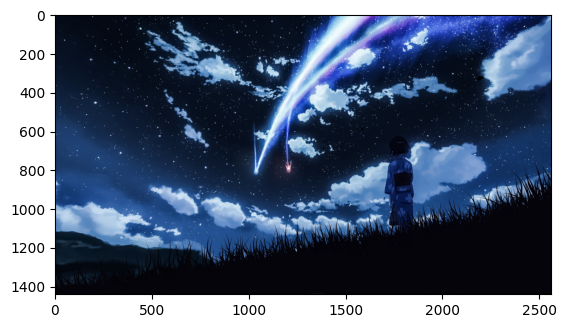

In [5]:
plt.imshow(mitsuha.load_numpy(), cmap='gray')

In [6]:
import PIL.Image as Image

In [7]:
pil_image = Image.fromarray(mitsuha.load_numpy())
pil_image = pil_image.convert("L")

In [8]:
pil_image.show()

In [9]:
image_processor = ImageProcessor()

In [10]:
edges = image_processor.find_edges(pil_image)

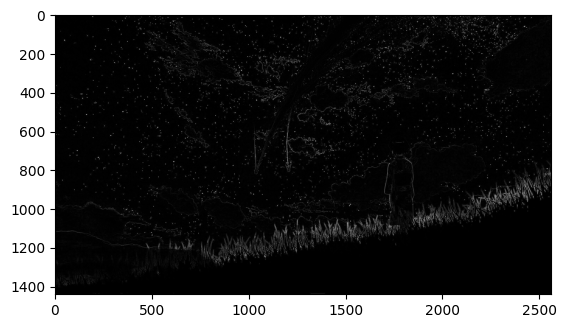

In [11]:
plt.imshow(edges, cmap='gray')

In [12]:
result_x, result_y = image_processor.sobel(pil_image)

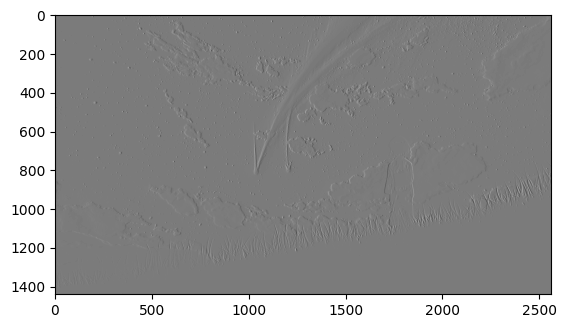

In [14]:
plt.imshow(result_x, cmap='gray')

In [15]:
import numpy as np
angles = np.arctan2(result_x, result_y)
scaled_angles = angles * 180 / np.pi

In [16]:
Image.fromarray(scaled_angles).show()

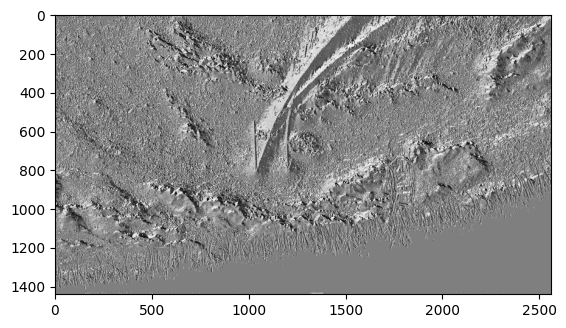

In [17]:
plt.imshow(scaled_angles, cmap='gray')

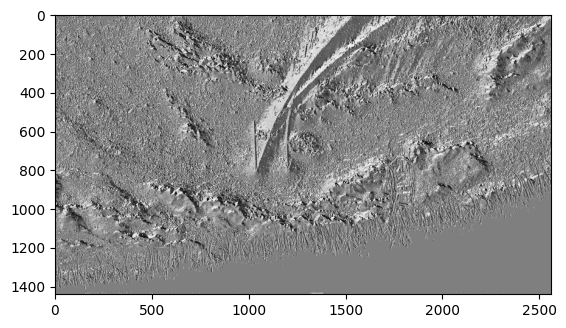

In [18]:
plt.imshow(scaled_angles, cmap='gray')

In [19]:
def get_char(angle):
    if -180 <= angle <= -157.5:
        return "－"
    if -157.5 <= angle <= -112.5:
        return "＼"
    if -112.5 <= angle <= -67.5:
        return "｜"
    if -67.5 <= angle <= -45:
        return "／"
    if -45 <= angle <= -22.5:
        return "／"
    if -22.5 <= angle <= 22.5:
        return "－"
    if 22.5 <= angle <= 45:
        return "＼"
    if 45 <= angle <= 90:
        return "｜"
    if 90 <= angle <= 135:
        return "／"
    if 135 <= angle <= 180:
        return "－"
    else: return "．"

In [20]:
chars = np.zeros_like(scaled_angles).astype(str)
for i in range(scaled_angles.shape[0]):
    for j in range(scaled_angles.shape[1]):
        if edges[i, j] >= 50:
            chars[i, j] = get_char(scaled_angles[i, j])
        else:
            chars[i, j] = "．"

with open("chars.txt", "w") as f:
    for i in range(chars.shape[0]):
        f.write("".join(list(chars[i, :])))
        f.write("\n")

In [24]:
def edge_highlighting(image_path: str, downsample: int = 2):
    image = ImageLoader(image_path)
    pil_image = Image.fromarray(image.load_numpy())
    pil_image = pil_image.convert("L")
    print("Opened image")
    image_processor = ImageProcessor()
    edges = image_processor.find_edges(pil_image)
    result_x, result_y = image_processor.sobel(pil_image)
    print("Calculated Sobel")
    angles = np.arctan2(result_x, result_y)

    edges = edges[::downsample, ::downsample]
    angles = angles[::downsample, ::downsample]

    scaled_angles = angles * 180 / np.pi
    chars = np.zeros_like(scaled_angles).astype(str)
    for i in range(scaled_angles.shape[0]):
        for j in range(scaled_angles.shape[1]):
            if edges[i, j] >= 50:
                chars[i, j] = get_char(scaled_angles[i, j])
            else:
                chars[i, j] = "　"

    with open("chars.txt", "w") as f:
        for i in range(chars.shape[0]):
            f.write("".join(list(chars[i, :])))
            f.write("\n")

In [25]:
edge_highlighting("inputs/meteor.jpeg", downsample=4)

Opened image
Calculated Sobel
